## Importing pandas

### Getting started and checking your pandas setup

Difficulty: *easy*

**1.** Import pandas under the alias `pd`.

In [ ]:
import pandas as pd

**2.** Print the version of pandas that has been imported.

In [ ]:
pd.__version__

'2.2.2'

**3.** Print out all the *version* information of the libraries that are required by the pandas library.

In [ ]:
pd.show_versions()

/usr/local/lib/python3.11/dist-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(



INSTALLED VERSIONS
------------------
commit                : d9cdd2ee5a58015ef6f4d15c7226110c9aab8140
python                : 3.11.11.final.0
python-bits           : 64
OS                    : Linux
OS-release            : 6.1.85+
Version               : #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
machine               : x86_64
processor             : x86_64
byteorder             : little
LC_ALL                : en_US.UTF-8
LANG                  : en_US.UTF-8
LOCALE                : en_US.UTF-8

pandas                : 2.2.2
numpy                 : 1.26.4
pytz                  : 2025.1
dateutil              : 2.8.2
setuptools            : 75.1.0
pip                   : 24.1.2
Cython                : 3.0.12
pytest                : 8.3.5
hypothesis            : None
sphinx                : 8.1.3
blosc                 : None
feather               : None
xlsxwriter            : None
lxml.etree            : 5.3.1
html5lib              : 1.1
pymysql               : None
psycopg2   

## DataFrame basics

### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

Difficulty: *easy*

Note: remember to import numpy using:
```python
import numpy as np
```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [ ]:
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**5.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [ ]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


**6.** Return the first 3 rows of the DataFrame `df`.

In [ ]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [ ]:
df[["animal", "age"]]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [ ]:
df.iloc[[3, 4, 8], df.columns.get_loc('animal'):df.columns.get_loc('age') + 1]


,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**9.** Select only the rows where the number of visits is greater than 3.

In [ ]:
df[df['visits'] > 3]


,animal,age,visits,priority


**10.** Select the rows where the age is missing, i.e. it is `NaN`.

In [ ]:
df[df['age'].isna()]


,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [ ]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]


,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**12.** Select the rows the age is between 2 and 4 (inclusive).

In [ ]:
df[(df['age'] >= 2) & (df['age'] <= 4)]


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**13.** Change the age in row 'f' to 1.5.

In [ ]:
df.loc['f', 'age'] = 1.5


**14.** Calculate the sum of all visits in `df` (i.e. find the total number of visits).

In [ ]:
df['visits'].sum()


19

**15.** Calculate the mean age for each different animal in `df`.

In [ ]:
df.groupby('animal')['age'].mean()


,age
animal,
cat,2.333333
dog,5.000000
snake,2.500000


**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [ ]:
df.loc['k'] = ['cat', 3, 5]  # Example values: 'cat' for animal, 3 for age, 5 for visits
df = df.drop('k')


ValueError: cannot set a row with mismatched columns

**17.** Count the number of each type of animal in `df`.

In [ ]:
df['animal'].value_counts()


,count
animal,
cat,4
dog,4
snake,2


**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [ ]:
df = df.sort_values(by=['age', 'visits'], ascending=[False, True])


**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [ ]:
df['priority'] = df['priority'].replace({'yes': True, 'no': False})


<ipython-input-23-db115a1d9175>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['priority'] = df['priority'].replace({'yes': True, 'no': False})


**20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [ ]:
df['animal'] = df['animal'].replace('snake', 'python')


**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (*hint: use a pivot table*).

In [ ]:
pivot_table = df.pivot_table(values='age', index='animal', columns='visits', aggfunc='mean')


## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

In [ ]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df_filtered = df[df['A'] != df['A'].shift()]
print(df_filtered)


   A
0  1
1  2
3  3
4  4
5  5
8  6
9  7


**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.random(size=(5, 3)))
df = df.sub(df.mean(axis=1), axis=0)
print(df)


          0         1         2
0  0.307975 -0.347822  0.039847
1  0.385872 -0.328248 -0.057624
2  0.138295 -0.414303  0.276008
3  0.313063 -0.397471  0.084408
4 -0.271543  0.624690 -0.353147


**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum?  Return that column's label.

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
min_sum_column = df.sum().idxmin()
print(min_sum_column)


f


**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)? As input, use a DataFrame of zeros and ones with 10 rows and 3 columns.

```python
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
```

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
unique_rows_count = len(df.drop_duplicates())
print(unique_rows_count)


6


The next three puzzles are slightly harder.


**26.** In the cell below, you have a DataFrame `df` that consists of 10 columns of floating-point numbers. Exactly 5 entries in each row are NaN values.

For each row of the DataFrame, find the *column* which contains the *third* NaN value.

You should return a Series of column labels: `e, c, d, h, d`

In [ ]:
nan = np.nan

data = [[0.04,  nan,  nan, 0.25,  nan, 0.43, 0.71, 0.51,  nan,  nan],
        [ nan,  nan,  nan, 0.04, 0.76,  nan,  nan, 0.67, 0.76, 0.16],
        [ nan,  nan, 0.5 ,  nan, 0.31, 0.4 ,  nan,  nan, 0.24, 0.01],
        [0.49,  nan,  nan, 0.62, 0.73, 0.26, 0.85,  nan,  nan,  nan],
        [ nan,  nan, 0.41,  nan, 0.05,  nan, 0.61,  nan, 0.48, 0.68]]
columns = list('abcdefghij')
df = pd.DataFrame(data, columns=columns)

**27.** A DataFrame has a column of groups 'grps' and and column of integer values 'vals':

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'),
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values. You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [ ]:
import pandas as pd
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'),
                   'vals': [12, 345, 3, 1, 45, 14, 4, 52, 54, 23, 235, 21, 57, 3, 87]})
result = df.groupby('grps')['vals'].apply(lambda x: x.nlargest(3).sum())
print(result)


grps
a    409
b    156
c    345
Name: vals, dtype: int64


**28.** The DataFrame `df` constructed below has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive).

For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

The answer should be a Series as follows:

```
A
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
```

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)
df = pd.DataFrame({
    'A': np.random.randint(1, 101, size=100),
    'B': np.random.randint(1, 1000, size=100)
})
bins = pd.cut(df['A'], bins=range(0, 101, 10))
result = df.groupby(bins)['B'].sum()
print(result)


A
(0, 10]      4397
(10, 20]     4305
(20, 30]     4175
(30, 40]     6647
(40, 50]     6250
(50, 60]     4494
(60, 70]     3393
(70, 80]     3995
(80, 90]     7588
(90, 100]    1962
Name: B, dtype: int64


<ipython-input-35-7c2d4dde8aaf>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby(bins)['B'].sum()


## DataFrames: harder problems

### These might require a bit of thinking outside the box...

...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit `for` loops).

Difficulty: *hard*

**29.** Consider a DataFrame `df` where there is an integer column 'X':
```python
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
```
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be

```
[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]
```

Make this a new column 'Y'.

**30.** Consider the DataFrame constructed below which contains rows and columns of numerical data.

Create a list of the column-row index locations of the 3 largest values in this DataFrame. In this case, the answer should be:
```
[(5, 7), (6, 4), (2, 5)]
```

In [ ]:
import pandas as pd
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
y_values = []
count = 0
for value in df['X']:
    if value == 0:
        count = 0
    else:
        count += 1
    y_values.append(count)
df['Y'] = y_values
print(df)


   X  Y
0  7  1
1  2  2
2  0  0
3  3  1
4  4  2
5  2  3
6  5  4
7  0  0
8  3  1
9  4  2


**31.** You are given the DataFrame below with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals'.

```python
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15),
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
```

Create a new column 'patched_values' which contains the same values as the 'vals' any negative values in 'vals' with the group mean:

```
    vals grps  patched_vals
0    -12    A          13.6
1     -7    B          28.0
2    -14    A          13.6
3      4    A           4.0
4     -7    A          13.6
5     28    B          28.0
6     -2    A          13.6
7     -1    A          13.6
8      8    A           8.0
9     -2    B          28.0
10    28    A          28.0
11    12    A          12.0
12    16    A          16.0
13   -24    A          13.6
14   -12    A          13.6
```

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    "vals": np.random.RandomState(31).randint(-30, 30, size=15),
    "grps": np.random.RandomState(31).choice(["A", "B"], 15)
})
group_means = df.groupby('grps')['vals'].transform('mean')
df['patched_values'] = df.apply(lambda row: group_means[row.name] if row['vals'] < 0 else row['vals'], axis=1)
print(df)


    vals grps  patched_values
0    -12    A       -0.333333
1     -7    B        6.333333
2    -14    A       -0.333333
3      4    A        4.000000
4     -7    A       -0.333333
5     28    B       28.000000
6     -2    A       -0.333333
7     -1    A       -0.333333
8      8    A        8.000000
9     -2    B        6.333333
10    28    A       28.000000
11    12    A       12.000000
12    16    A       16.000000
13   -24    A       -0.333333
14   -12    A       -0.333333


**32.** Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

```python
>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
```
The goal is to compute the Series:

```
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
```
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'group': list('aabbabbbabab'),
    'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]
})
df['rolling_mean'] = df.groupby('group')['value'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)
print(df)


   group  value  rolling_mean
0      a    1.0      1.000000
1      a    2.0      1.500000
2      b    3.0      3.000000
3      b    NaN      3.000000
4      a    2.0      1.666667
5      b    3.0      3.000000
6      b    NaN      3.000000
7      b    1.0      2.000000
8      a    7.0      3.666667
9      b    3.0      2.000000
10     a    NaN      4.500000
11     b    8.0      4.000000


## Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


**33.** Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [ ]:
import pandas as pd
import numpy as np
dates = pd.date_range('2015-01-01', '2015-12-31', freq='B')
s = pd.Series(np.random.rand(len(dates)), index=dates)
print(s)


2015-01-01    0.411820
2015-01-02    0.675439
2015-01-05    0.249796
2015-01-06    0.313218
2015-01-07    0.965416
                ...   
2015-12-25    0.580197
2015-12-28    0.716244
2015-12-29    0.027069
2015-12-30    0.731397
2015-12-31    0.766964
Freq: B, Length: 261, dtype: float64


**34.** Find the sum of the values in `s` for every Wednesday.

In [ ]:
import pandas as pd
import numpy as np
dates = pd.date_range('2015-01-01', '2015-12-31', freq='B')
s = pd.Series(np.random.rand(len(dates)), index=dates)
wednesdays = s[s.index.weekday == 2]
wednesday_sum = wednesdays.sum()
print(wednesday_sum)


30.43404653541454


**35.** For each calendar month in `s`, find the mean of values.

In [ ]:
import pandas as pd
import numpy as np
dates = pd.date_range('2015-01-01', '2015-12-31', freq='B')
s = pd.Series(np.random.rand(len(dates)), index=dates)
monthly_mean = s.groupby(s.index.month).mean()
monthly_mean.index = monthly_mean.index.map(lambda x: pd.to_datetime(f'2015-{x:02d}-01').strftime('%B'))
print(monthly_mean)


January      0.521568
February     0.426140
March        0.623612
April        0.390897
May          0.473527
June         0.573040
July         0.519124
August       0.540613
September    0.373834
October      0.526375
November     0.512310
December     0.477592
dtype: float64


**36.** For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [ ]:
import pandas as pd
import numpy as np
dates = pd.date_range('2015-01-01', '2015-12-31', freq='B')
s = pd.Series(np.random.rand(len(dates)), index=dates)
s['group'] = (s.index.month - 1) // 4 + 1
def get_highest_value_date(group):
    max_value_idx = group.idxmax()
    return max_value_idx
highest_dates = s.groupby('group').apply(get_highest_value_date)
print(highest_dates)


KeyError: 'group'

**37.** Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [ ]:
import pandas as pd
import numpy as np
dates = pd.date_range('2015-01-01', '2016-12-31', freq='MS')
def third_thursday(date):
    first_thursday = date + pd.DateOffset(days=(3 - date.weekday()) % 7)
    return first_thursday + pd.DateOffset(weeks=2)
third_thursdays = dates.map(third_thursday)
third_thursdays = pd.DatetimeIndex(third_thursdays)
print(third_thursdays)


DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq=None)


## Cleaning Data

### Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                               '12. Air France', '"Swiss Air"']})
```
Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```


(It's some flight data I made up; it's not meant to be accurate in any way.)


**38.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [ ]:
import pandas as pd
import numpy as np
data = {
    'FlightNumber': [10055, np.nan, 10075, np.nan, np.nan, 10105]
}
df = pd.DataFrame(data)
for i in range(1, len(df)):
    if pd.isna(df.loc[i, 'FlightNumber']):
        df.loc[i, 'FlightNumber'] = df.loc[i-1, 'FlightNumber'] + 10
df['FlightNumber'] = df['FlightNumber'].astype(int)
print(df)


   FlightNumber
0         10055
1         10065
2         10075
3         10085
4         10095
5         10105


**39.** The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to give a new temporary DataFrame called 'temp' with the correct values. Assign the correct column names 'From' and 'To' to this temporary DataFrame.

In [ ]:
import pandas as pd
data = {
    'From_To': ['NewYork_London', 'Paris_Berlin', 'Tokyo_Sydney']
}
df = pd.DataFrame(data)
temp.columns = ['From', 'To']
print(temp)


NameError: name 'temp' is not defined

**40.** Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame 'temp'. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [ ]:
import pandas as pd
data = {
    'From_To': ['NewYork_London', 'Paris_Berlin', 'Tokyo_Sydney']
}
df = pd.DataFrame(data)
temp = df['From_To'].str.split('_', expand=True)
temp.columns = ['From', 'To']
temp['From'] = temp['From'].str.title()
temp['To'] = temp['To'].str.title()
print(temp)


      From      To
0  Newyork  London
1    Paris  Berlin
2    Tokyo  Sydney


**41.** Delete the **From_To** column from `df` and attach the temporary DataFrame 'temp' from the previous questions.

In [ ]:
import pandas as %p def
data = {
    'From_To': ['NewYork_London', 'Paris_Berlin', 'Tokyo_Sydney']
}
df = pd.DataFrame(data)
temp = df['From_To'].str.split('_', expand=True)
temp.columns = ['From', 'To']
temp['From'] = temp['From'].str.title()
temp['To'] = temp['To'].str.title()
df = df.drop('From_To', axis=1)
df = pd.concat([df, temp], axis=1)
print(df)


**42**. In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [ ]:
import pandas as pd
data = {
    'Airline': ['(British Airways. )', '  (Delta Airlines) ', '(United Airlines. )', '(Air France) ']
}
df = pd.DataFrame(data)
df['Airline'] = df['Airline'].str.replace(r'[^\w\s]', '', regex=True).str.strip()
print(df)


           Airline
0  British Airways
1   Delta Airlines
2  United Airlines
3       Air France


**43**. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

In [ ]:
import pandas as pd
import numpy as np
data = {
    'Airline': ['British Airways', 'Delta Airlines', 'United Airlines'],
    'RecentDelays': [[5, 10, 15], [30, 45], [20, 25, 30, 35]]
}
df = pd.DataFrame(data)
delays = pd.DataFrame(df['RecentDelays'].tolist())
delays.columns = [f'delay_{i+1}' for i in range(delays.shape[1])]
df = df.drop('RecentDelays', axis=1)
df = pd.concat([df, delays], axis=1)
print(df)


           Airline  delay_1  delay_2  delay_3  delay_4
0  British Airways        5       10     15.0      NaN
1   Delta Airlines       30       45      NaN      NaN
2  United Airlines       20       25     30.0     35.0


The DataFrame should look much better now.
```
   FlightNumber          Airline      From         To  delay_1  delay_2  delay_3
0         10045              KLM    London      Paris     23.0     47.0      NaN
1         10055       Air France    Madrid      Milan      NaN      NaN      NaN
2         10065  British Airways    London  Stockholm     24.0     43.0     87.0
3         10075       Air France  Budapest      Paris     13.0      NaN      NaN
4         10085        Swiss Air  Brussels     London     67.0     32.0      NaN
```

## Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

Difficulty: *medium*

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using *multiple* levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

To warm up, we'll look make a Series with two index levels.

**44**. Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [ ]:
import pandas as pd
import numpy as np
import itertools
letters = ['A', 'B', 'C']
numbers = list(range(10))
product = list(itertools.product(letters, numbers))
multi_index = pd.MultiIndex.from_tuples(product, names=['Letter', 'Number'])
random_series = pd.Series(np.random.random(size=len(multi_index)), index=multi_index)
print(random_series)


Letter  Number
A       0         0.005315
        1         0.060335
        2         0.898192
        3         0.118932
        4         0.595584
        5         0.354821
        6         0.033772
        7         0.082876
        8         0.765832
        9         0.842402
B       0         0.363224
        1         0.246772
        2         0.493591
        3         0.152283
        4         0.616941
        5         0.739508
        6         0.703966
        7         0.932080
        8         0.601714
        9         0.595197
C       0         0.736985
        1         0.725784
        2         0.279172
        3         0.797254
        4         0.904440
        5         0.779409
        6         0.849383
        7         0.848722
        8         0.247618
        9         0.827051
dtype: float64


**45.** Check the index of `s` is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [ ]:
is_sorted = s.index.is monotonic
print("Is the index lexicographically sorted?", is_sorted)


SyntaxError: invalid syntax (<ipython-input-58-468d16c22b5e>, line 1)

**46**. Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [ ]:
import pandas as pd
import numpy as np
import itertools
letters = ['A', 'B', 'C']
numbers = list(range(10))
product = list(itertools.product(letters, numbers))
multi_index = pd.MultiIndex.from_tuples(product, names=['Letter', 'Number'])
s = pd.Series(np.random.random(size=len(multi_index)), index=multi_index)
selected_values = s.xs(key=[1, 3, 6], level='Number')
print(selected_values)


TypeError: list keys are not supported in xs, pass a tuple instead

**47**. Slice the Series `s`; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [ ]:
import pandas as pd
import numpy as np
import itertools
letters = ['A', 'B', 'C']
numbers = list(range(10))
product = list(itertools.product(letters, numbers))
multi_index = pd.MultiIndex.from_tuples(product, names=['Letter', 'Number'])
s = pd.Series(np.random.random(size=len(multi_index)), index=multi_index)
sliced_series = s.loc[:('B', 5):]
print(sliced_series)


Letter  Number
A       0         0.055981
        1         0.950956
        2         0.514462
        3         0.000692
        4         0.523365
        5         0.380595
        6         0.985360
        7         0.260588
        8         0.446547
        9         0.094697
B       0         0.876648
        1         0.037534
        2         0.771241
        3         0.278329
        4         0.139133
        5         0.701441
dtype: float64


**48**. Sum the values in `s` for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [ ]:
sum_by_letter = s.groupby('Letter').sum()
print(sum_by_letter)


Letter
A    4.213243
B    4.408254
C    4.772965
dtype: float64


**49**. Suppose that `sum()` (and other methods) did not accept a `level` keyword argument. How else could you perform the equivalent of `s.sum(level=1)`?

In [ ]:
sum_by_second_level = s.groupby(level=1).sum()
print(sum_by_second_level)


Number
0    1.289070
1    1.620209
2    1.748286
3    0.925350
4    1.272035
5    1.282987
6    1.947698
7    0.599423
8    1.815126
9    0.894280
dtype: float64


**50**. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [ ]:
s_swapped = s.swaplevel()
is_sorted = s_swapped.index.is_monotonic
print("Is the new index lexicographically sorted?", is_sorted)
if not is_sorted:
    s_swapped = s_swapped.sort_index()
print(s_swapped)


AttributeError: 'MultiIndex' object has no attribute 'is_monotonic'

## Minesweeper

### Generate the numbers for safe squares in a Minesweeper grid

Difficulty: *medium* to *hard*

If you've ever used an older version of Windows, there's a good chance you've played with Minesweeper:
- https://en.wikipedia.org/wiki/Minesweeper_(video_game)


If you're not familiar with the game, imagine a grid of squares: some of these squares conceal a mine. If you click on a mine, you lose instantly. If you click on a safe square, you reveal a number telling you how many mines are found in the squares that are immediately adjacent. The aim of the game is to uncover all squares in the grid that do not contain a mine.

In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.

**51**. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
```
X = 5
Y = 4
```
To begin, generate a DataFrame `df` with two columns, `'x'` and `'y'` containing every coordinate for this grid. That is, the DataFrame should start:
```
   x  y
0  0  0
1  0  1
2  0  2
```

In [ ]:
import pandas as pd
X = 5
Y = 4
coordinates = [(x, y) for x in range(X) for y in range(Y)]
df = pd.DataFrame(coordinates, columns=['x', 'y'])
print(df.head())


   x  y
0  0  0
1  0  1
2  0  2
3  0  3
4  1  0


**52**. For this DataFrame `df`, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [ ]:
import pandas as pd
import numpy as np
X = 5
Y = 4
coordinates = [(x, y) for x in range(X) for y in range(Y)]
df = pd.DataFrame(coordinates, columns=['x', 'y'])
df['mine'] = np.random.choice([0, 1], size=len(df), p=[0.6, 0.4])
print(df)


    x  y  mine
0   0  0     0
1   0  1     0
2   0  2     1
3   0  3     0
4   1  0     1
5   1  1     1
6   1  2     0
7   1  3     1
8   2  0     1
9   2  1     1
10  2  2     0
11  2  3     0
12  3  0     0
13  3  1     1
14  3  2     0
15  3  3     1
16  4  0     1
17  4  1     1
18  4  2     1
19  4  3     0


**53**. Now create a new column for this DataFrame called `'adjacent'`. This column should contain the number of mines found on adjacent squares in the grid.

(E.g. for the first row, which is the entry for the coordinate `(0, 0)`, count how many mines are found on the coordinates `(0, 1)`, `(1, 0)` and `(1, 1)`.)

In [ ]:
import pandas as pd
import numpy as np
X = 5
Y = 4
coordinates = [(x, y) for x in range(X) for y in range(Y)]
df = pd.DataFrame(coordinates, columns=['x', 'y'])
df['mine'] = np.random.choice([0, 1], size=len(df), p=[0.6, 0.4])
def count_adjacent_mines(row, df):
    x, y = row['x'], row['y']
    adjacent_positions = [
        (x-1, y-1), (x-1, y), (x-1, y+1),
        (x, y-1),             (x, y+1),
        (x+1, y-1), (x+1, y), (x+1, y+1)
    ]
    valid_adjacent = [(a, b) for a, b in adjacent_positions if 0 <= a < X and 0 <= b < Y]
    adjacent_mines = sum([1 for a, b in valid_adjacent if df[(df['x'] == a) & (df['y'] == b)]['mine'].values[0] == 1])
    return adjacent_mines
df['adjacent'] = df.apply(lambda row: count_adjacent_mines(row, df), axis=1)
print(df)


    x  y  mine  adjacent
0   0  0     0         1
1   0  1     1         1
2   0  2     1         3
3   0  3     1         2
4   1  0     0         1
5   1  1     0         2
6   1  2     0         4
7   1  3     1         2
8   2  0     0         0
9   2  1     0         1
10  2  2     0         2
11  2  3     0         2
12  3  0     0         0
13  3  1     0         2
14  3  2     1         1
15  3  3     0         2
16  4  0     0         0
17  4  1     0         2
18  4  2     1         1
19  4  3     0         2


**54**. For rows of the DataFrame that contain a mine, set the value in the `'adjacent'` column to NaN.

In [ ]:
import pandas as pd
import numpy as np
X = 5
Y = 4
coordinates = [(x, y) for x in range(X) for y in range(Y)]
df = pd.DataFrame(coordinates, columns=['x', 'y'])
df['mine'] = np.random.choice([0, 1], size=len(df), p=[0.6, 0.4])
def count_adjacent_mines(row, df):
    x, y = row['x'], row['y']
    adjacent_positions = [
        (x-1, y-1), (x-1, y), (x-1, y+1),
        (x, y-1),             (x, y+1),
        (x+1, y-1), (x+1, y), (x+1, y+1)
    ]
    valid_adjacent = [(a, b) for a, b in adjacent_positions if 0 <= a < X and 0 <= b < Y]
    adjacent_mines = sum([1 for a, b in valid_adjacent if df[(df['x'] == a) & (df['y'] == b)]['mine'].values[0] == 1])
    return adjacent_mines
df['adjacent'] = df.apply(lambda row: count_adjacent_mines(row, df), axis=1)
df.loc[df['mine'] == 1, 'adjacent'] = np.nan
print(df)


    x  y  mine  adjacent
0   0  0     0       1.0
1   0  1     0       2.0
2   0  2     0       2.0
3   0  3     0       1.0
4   1  0     0       3.0
5   1  1     1       NaN
6   1  2     1       NaN
7   1  3     0       2.0
8   2  0     1       NaN
9   2  1     1       NaN
10  2  2     1       NaN
11  2  3     0       3.0
12  3  0     1       NaN
13  3  1     1       NaN
14  3  2     0       5.0
15  3  3     1       NaN
16  4  0     0       2.0
17  4  1     0       2.0
18  4  2     0       3.0
19  4  3     1       NaN


**55**. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the `x` coordinate, rows are the `y` coordinate.

In [ ]:
import pandas as pd
import numpy as np
X = 5
Y = 4
coordinates = [(x, y) for x in range(X) for y in range(Y)]
df = pd.DataFrame(coordinates, columns=['x', 'y'])
df['mine'] = np.random.choice([0, 1], size=len(df), p=[0.6, 0.4])
def count_adjacent_mines(row, df):
    x, y = row['x'], row['y']
    adjacent_positions = [
        (x-1, y-1), (x-1, y), (x-1, y+1),
        (x, y-1),             (x, y+1),
        (x+1, y-1), (x+1, y), (x+1, y+1)
    ]
    valid_adjacent = [(a, b) for a, b in adjacent_positions if 0 <= a < X and 0 <= b < Y]
    adjacent_mines = sum([1 for a, b in valid_adjacent if df[(df['x'] == a) & (df['y'] == b)]['mine'].values[0] == 1])
    return adjacent_mines
df['adjacent'] = df.apply(lambda row: count_adjacent_mines(row, df), axis=1)
df.loc[df['mine'] == 1, 'adjacent'] = np.nan
grid = df.pivot(index='y', columns='x', values='adjacent')
grid = grid.fillna(0)
print(grid)


x    0    1    2    3    4
y                         
0  0.0  3.0  0.0  2.0  0.0
1  1.0  3.0  0.0  4.0  2.0
2  1.0  2.0  3.0  0.0  0.0
3  0.0  1.0  2.0  0.0  3.0


## Plotting

### Visualize trends and patterns in data

Difficulty: *medium*

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

**56.** Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers.

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

**57.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

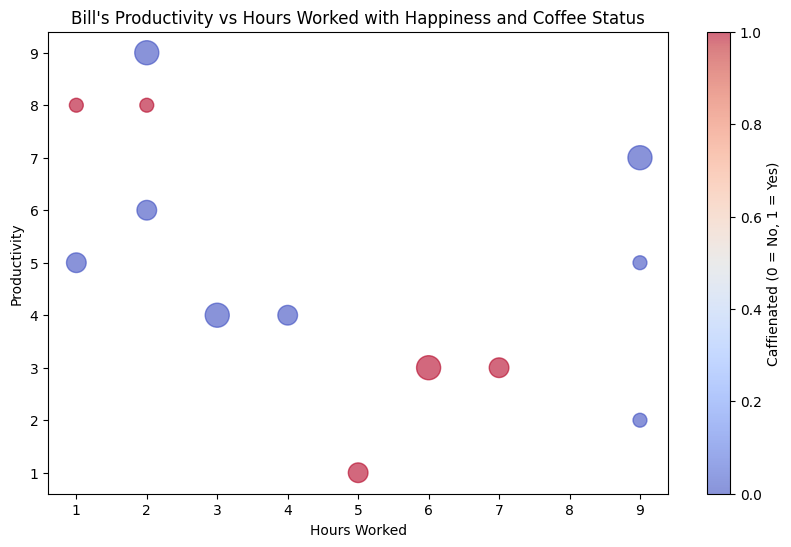

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame({
    "productivity": [5, 2, 3, 1, 4, 5, 6, 7, 8, 3, 4, 8, 9],
    "hours_in": [1, 9, 6, 5, 3, 9, 2, 9, 1, 7, 4, 2, 2],
    "happiness": [2, 1, 3, 2, 3, 1, 2, 3, 1, 2, 2, 1, 3],
    "caffienated": [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]
})
plt.figure(figsize=(10, 6))
plt.scatter(
    x=df['hours_in'],
    y=df['productivity'],
    s=df['happiness'] * 100,
    c=df['caffienated'],
    cmap='coolwarm',
    alpha=0.6  )
plt.title("Bill's Productivity vs Hours Worked with Happiness and Coffee Status")
plt.xlabel("Hours Worked")
plt.ylabel("Productivity")
plt.colorbar(label='Caffienated (0 = No, 1 = Yes)')  # Color bar for coffee status
plt.show()


**58.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

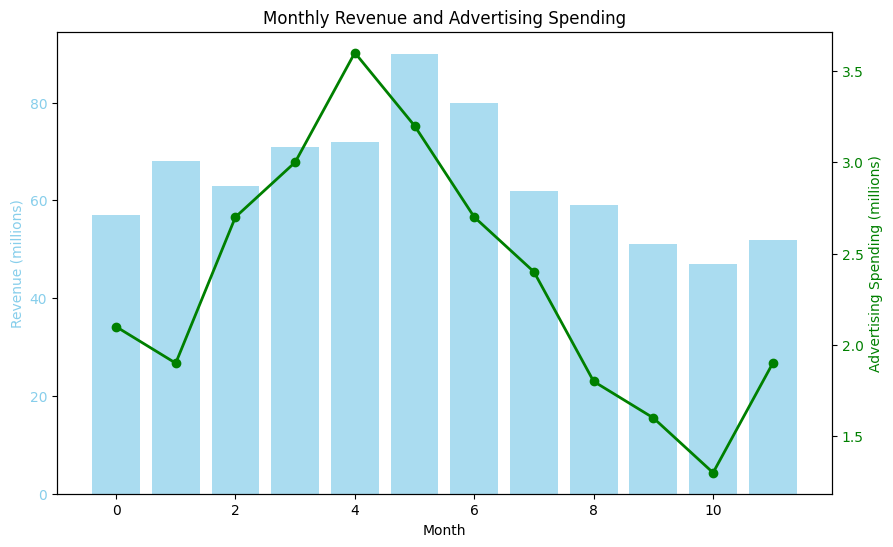

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({
    "revenue": [57, 68, 63, 71, 72, 90, 80, 62, 59, 51, 47, 52],
    "advertising": [2.1, 1.9, 2.7, 3.0, 3.6, 3.2, 2.7, 2.4, 1.8, 1.6, 1.3, 1.9],
    "month": range(12)
})
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(df['month'], df['revenue'], color='skyblue', label='Revenue', alpha=0.7)
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue (millions)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax2 = ax1.twinx()
ax2.plot(df['month'], df['advertising'], color='green', label='Advertising Spending', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Advertising Spending (millions)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
plt.title("Monthly Revenue and Advertising Spending")
plt.show()


Now we're finally ready to create a candlestick chart, which is a very common tool used to analyze stock price data.  A candlestick chart shows the opening, closing, highest, and lowest price for a stock during a time window.  The color of the "candle" (the thick part of the bar) is green if the stock closed above its opening price, or red if below.

![Candlestick Example](img/candle.jpg)

This was initially designed to be a pandas plotting challenge, but it just so happens that this type of plot is just not feasible using pandas' methods.  If you are unfamiliar with matplotlib, we have provided a function that will plot the chart for you so long as you can use pandas to get the data into the correct format.

Your first step should be to get the data in the correct format using pandas' time-series grouping function.  We would like each candle to represent an hour's worth of data.  You can write your own aggregation function which returns the open/high/low/close, but pandas has a built-in which also does this.

The below cell contains helper functions.  Call ```day_stock_data()``` to generate a DataFrame containing the prices a hypothetical stock sold for, and the time the sale occurred.  Call ```plot_candlestick(df)``` on your properly aggregated and formatted stock data to print the candlestick chart.

In [ ]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)
def day_stock_data():
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df
def plot_candlestick(agg):
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)
    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

**59.** Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)
time_index = pd.date_range('2025-03-15 00:00', '2025-03-15 23:59', freq='T')
stock_data = {
    'open': np.random.rand(len(time_index)) * 100,
    'high': np.random.rand(len(time_index)) * 100 + 50,
    'low': np.random.rand(len(time_index)) * 50,
    'close': np.random.rand(len(time_index)) * 100,
}
df = pd.DataFrame(stock_data, index=time_index)
print("First few rows of the DataFrame:")
print(df.head())
hourly_df = df.resample('H').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last'
})
print("\nHourly stock data summary:")
print(hourly_df)


First few rows of the DataFrame:
                          open        high        low      close
2025-03-15 00:00:00  37.454012  146.991205  16.578235  58.064523
2025-03-15 00:01:00  95.071431   59.390072  42.751510  93.593725
2025-03-15 00:02:00  73.199394  117.260212  10.353790  67.225069
2025-03-15 00:03:00  59.865848   94.375022   3.557914  48.127795
2025-03-15 00:04:00  15.601864  136.814225   3.450380  80.967504

Hourly stock data summary:
                          open        high       low      close
2025-03-15 00:00:00  37.454012  149.941373  0.000582  50.569674
2025-03-15 01:00:00  38.867729  146.292688  0.570899  24.067051
2025-03-15 02:00:00  80.744016  149.413936  0.607839  41.909947
2025-03-15 03:00:00  34.106635  149.248350  0.415997  99.694942
2025-03-15 04:00:00  94.045858  149.669685  1.095666  85.869812
2025-03-15 05:00:00   5.168172  147.587375  0.099607  63.137598
2025-03-15 06:00:00  38.816993  147.997033  0.498939  62.133062
2025-03-15 07:00:00  79.157904  149.6

<ipython-input-75-b4efcb631dad>:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_index = pd.date_range('2025-03-15 00:00', '2025-03-15 23:59', freq='T')
<ipython-input-75-b4efcb631dad>:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df = df.resample('H').agg({


**60.** Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart.  Use the ```plot_candlestick(df)``` function above, or matplotlib's [```plot``` documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) if you get stuck.

*More exercises to follow soon...*